# Flask and Fast API

# 1. SERVE PREDICTIONS USING FLASK

In [4]:
#Importing Libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import StandardScaler,MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn import metrics
from sklearn import tree
import os
working_directory=os.getcwd()
print(working_directory)

/Users/yochitharishitha/Downloads/lab01


In [5]:
#Load the dataset
path=working_directory + '/dataset/Crop_recommendation.csv'
#Read the csv file as dataframe
crop_df=pd.read_csv(path)

In [6]:
#Dataset features and label
features = crop_df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target_label = crop_df['label']

In [7]:
#Training and test set
x_train, x_test, y_train, y_test= train_test_split(features,target_label,test_size = 0.2,random_state =2)
print(f"Train Data: {x_train.shape}, {y_train.shape}")
print(f"Test Data: {x_test.shape}, {y_test.shape}")

Train Data: (1760, 7), (1760,)
Test Data: (440, 7), (440,)


Accuracy on Test Data: 99.54545454545455%


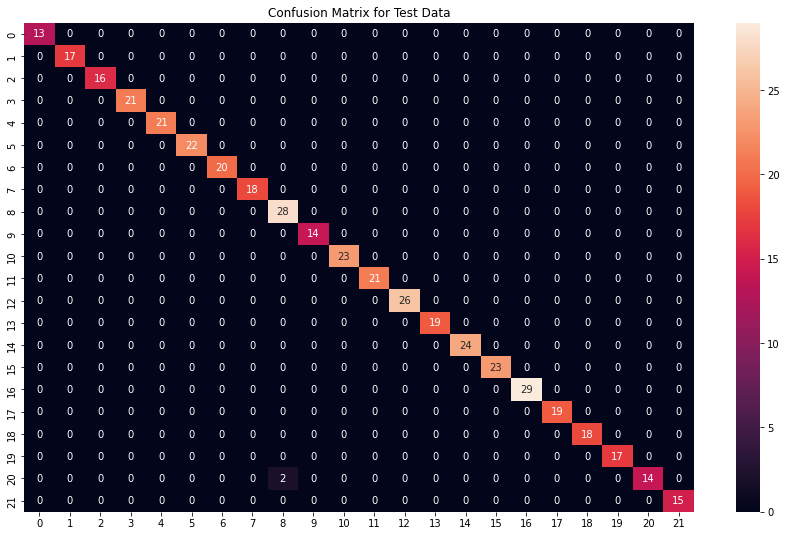

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.93      1.00      0.97        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
      papaya       1.00    

In [8]:
#Random Forest Classifier
rf_pipeline = make_pipeline(StandardScaler(), 
                            RandomForestClassifier(n_estimators = 350, 
                            max_depth = 12, 
                            max_features = 'sqrt', 
                            random_state = 42, 
                            criterion = 'entropy'))
rf_pipeline.fit(x_train, y_train)

# Accuracy on Test Data
rf_predictions = rf_pipeline.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Accuracy on Test Data: {rf_accuracy*100}%")
#confusion matrix
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y_test, rf_predictions), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()
print(classification_report(y_test,rf_predictions))

In [9]:
#import pickle library
import pickle
# Dump the trained Random forest classifier with Pickle
rf_filename = '/Users/yochitharishitha/Downloads/lab01/RandomForest.pkl'
# Open the file to save as pickle file
rf_model = open(rf_filename, 'wb')
pickle.dump(rf_pipeline, rf_model)
# Close pickle instances
rf_model.close()

In [10]:
#importing flask 
from flask import Flask, render_template, request
import numpy as np

In [11]:
# Loading crop recommendation model
crop_recommendation_model_path = '/Users/yochitharishitha/Downloads/lab01/RandomForest.pkl'
crop_recommendation_model = pickle.load(
    open(crop_recommendation_model_path, 'rb'))

In [ ]:
#using Flask 
app = Flask(__name__,template_folder="/Users/yochitharishitha/Downloads/lab01/")

@ app.route('/')
def home():
    title = 'CROP RECOMMENDATION'
    return render_template('CR_front.html', title=title)

@ app.route('/prediction', methods=['POST'])
def crop_prediction():
    title = 'CROP RECOMMENDATION'

    if request.method == 'POST':
        N = int(request.form['nitrogen'])
        P = int(request.form['phosphorous'])
        K = int(request.form['pottasium'])
        temp= float(request.form['temperature'])
        hum = float(request.form['humidity'])
        ph = float(request.form['ph'])
        rainfall = float(request.form['rainfall'])
        arr = np.array([[N,P,K,temp,hum,ph,rainfall]])
        prediction = crop_recommendation_model.predict(arr)
        return render_template('CR_front.html', Prediction_Text=prediction, title=title)

if __name__ == '__main__':
    app.run(port=5000)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [21/Jun/2022 20:26:15] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [21/Jun/2022 20:26:15] "GET /static-files/fontawesome/css/fontawesome-all.min.css HTTP/1.1" 404 -
127.0.0.1 - - [21/Jun/2022 20:26:15] "GET /static-files/static/js/main.de7a7407.js HTTP/1.1" 404 -
127.0.0.1 - - [21/Jun/2022 20:26:15] "GET /static-files/static/css/main.477e634f.css HTTP/1.1" 404 -
127.0.0.1 - - [21/Jun/2022 20:26:15] "GET /static-files/manifest.json HTTP/1.1" 404 -
127.0.0.1 - - [21/Jun/2022 20:26:15] "GET /static-files/fontawesome/webfonts/fa-regular-400.woff2 HTTP/1.1" 404 -
127.0.0.1 - - [21/Jun/2022 20:26:15] "GET /static-files/fontawesome/webfonts/fa-solid-900.woff2 HTTP/1.1" 404 -
127.0.0.1 - - [21/Jun/2022 20:26:15] "GET /static-files/static/media/home-logo.b14e3dd7dc63ea1769c6.png HTTP/1.1" 404 -
127.0.0.1 - - [21/Jun/2022 20:26:15] "GET /static-files/static/media/sync.2311451cd302a2eb77d8480e1c833d6d.svg HTTP/1.1" 404 -
127.0.0.1

# 2.SERVE PREDICTIONS USING FASTAPI

In [9]:
#installing fastapi and uvicorn
pip install fastapi

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install uvicorn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#using fastapi
import uvicorn
from fastapi import FastAPI
from pydantic import BaseModel

app=FastAPI(debug=True)

class CropRecommend(BaseModel):
    N:int
    P:int
    K:int
    temperature:float
    humidity:float
    ph:float
    rainfall:float

@ app.post('/docs')
async def crop_prediction(crop: CropRecommend):
    crop_data=crop.dict()
    crop_recommendation_model = pickle.load(open('/Users/yochitharishitha/Downloads/lab01/RandomForest.pkl', 'rb'))
    crop_data_in = [[crop_data['N'], crop_data['P'], crop_data['K'], crop_data['temperature'],crop_data['humidity'],crop_data['ph'],crop_data['rainfall']]]
    prediction = loaded_model.predict(crop_data_in)
    return {
        'prediction': prediction[0]
    }

if __name__ == '__main__':
    uvicorn.run(app,host='127.0.0.1',port=12000)